# Turing Patterns

## Theory

Turing patterns arise from the equilibrium of a reaction-diffusion system, after diffusion of several substances in space over time, and interaction between them. Such systems are described by a set of differential equations as 

$$\frac{\partial \textbf{q}}{\partial t} = \underline{\underline{D}}\cdot\Delta\textbf{q}+\textbf{R}(\textbf{q}) $$

where $\underline{\underline{D}}$ is a diagonal matrix containing all diffusion coefficients, $\cdot$ stands for matricial product. $\textbf{q}(\textbf{x},$t$)$ represents the vector of unknown functions, say for example the concentration of chemical substances, and $\textbf{R}$ takes account for all the local reactions between the substances.

In the examples we provide, two particular sets of differential equations are given, describing the interaction of two substances, as pigments, interacting together, starting for a random distribution of a two-dimensional grid.


The first set of equations are the so-called Fitzhugh-Nagumo equations, giving as a result a nice leopard pattern:

\begin{eqnarray}
\frac{\partial u }{\partial t} = a \Delta u + u - u^3 - v + k  \ , \label{eq:u}\\   
\tau \frac{\partial v}{\partial t} = b \Delta v - v + u \label{eq:v} 
\end{eqnarray}

where $a$, $b$ and $k$ are real constants, and given the vector $\mathbf{q} = (u,v)^{T}$. 

The second set corresponds to a simple reaction-diffusion model with wheighed non linear terms:

\begin{eqnarray}
\frac{\partial u }{\partial t} = c_u \frac{u^2}{v} - u - d_u \Delta u   \ , \label{eq2:u}\\  
\frac{\partial v}{\partial t} = c_v u^2 - v  + d_v \Delta v  \label{eq2:v} 
\end{eqnarray} 

$c_{\alpha}$ and $d_{\alpha}$ are constants.
With the given parameters, the solution of the latter shows a checkerboard, at equilibrium.

NB: The interested reader can change the numerical parameters in the code below and see what happens in different situations. 
Don't hesitate to share on the Discord / Moodle  some of your results ! 

<function matplotlib.pyplot.show(*args, **kw)>

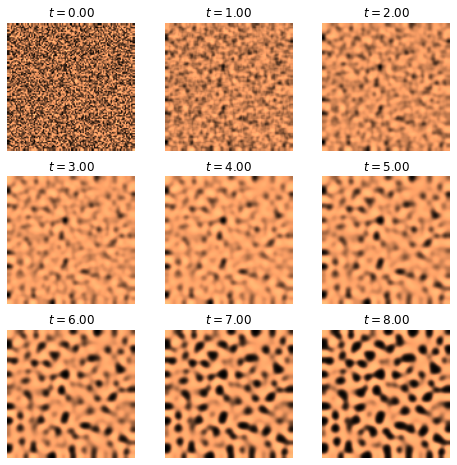

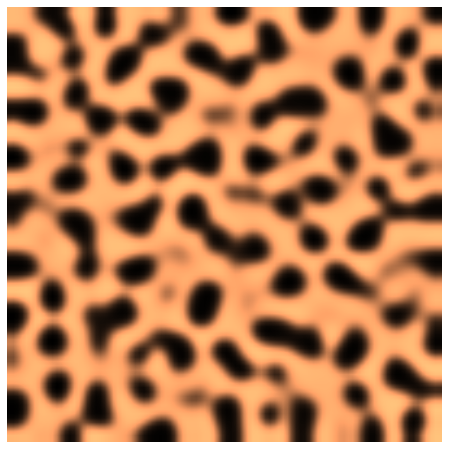

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
##CREATED BY SALOMON GUINCHARD 
##LATEST VERSION 11/05/21

######################################
#     PARAMETERS FITZHUGH-NAGUMO     #
######################################

a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

######################################
#   PARAMETERS DIFFUSION REACTION    #
######################################

CU = 5.0e-3
DU = .1 
CV = 2.8e-4
DV = .1

######################################

size = 100  # size of the 2D grid
dx = 2. / size  # space step
T = 9.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

U = np.random.rand(size, size)
V = np.random.rand(size, size)


############################################
######## DEFINES THE METHODS USED  #########
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9

#### FINITE DIFFERENCES TO SOLVE THE PDE ######
for i in range(n):
    
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    
    
###### COMMENT OR UNCOMMENT TO CHOOSE THE SET OF EQUATIONS YOU WANT ######
    
    ##### 1ST SET : FITZHUGH_NAGUMO EQUATION ######
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    
    ##### 2ND SET:  REACTION DIFFUSION MODEL ######
    #U[1:-1, 1:-1], V[1:-1, 1:-1] = \
    #Uc + dt * ((CU * Uc*Uc) / Vc - Uc + DU * deltaU),\
    #    Vc + dt * (CV * Uc*Uc - Vc + DV * deltaV)
    
###### NEUMANN BOUNDARY CONDITIONS - ZERO GRADIENT AT THE EDGES ########
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

####### PLOT OF THE GRID EVERY 0 MOD(9) STEP #######
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')
        
####### OUTPUT FIGURE #######       
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_patterns(U, ax=ax)
plt.show